In [123]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [60]:
x = torch.ones(1)
#requires_grad=True 标准对该变量求导
w = torch.full([1],2, requires_grad=True)

In [61]:
x

tensor([1.])

In [62]:
w

tensor([2.], requires_grad=True)

### 如果第二次执行， 报错。  因为每一次计算梯度后，动态图需要重构。retain_graph=True 可以保存动态图

In [103]:
mse = F.mse_loss(torch.ones(1), x*w)

In [104]:
mse.backward(retain_graph=True) # 对所有的的参数求导， 并且保存到参数.grad

In [105]:
w.grad

tensor([20.])

In [106]:
mse = F.mse_loss(torch.ones(1), x*w)

In [107]:
#对指定参数列表求导
torch.autograd.grad(mse, [w], retain_graph=True)

(tensor([2.]),)

In [108]:
t = torch.tensor([1.,2.,3.,4.], requires_grad=True)

In [109]:
torch.softmax(t, dim=0)[0].backward()
t.grad

tensor([ 0.0310, -0.0028, -0.0076, -0.0206])

# 最优化 Himmelblau function， 寻找最小值

$$f(x,y)=(x^2+y-11)^2 + (x+y^2-7)^2$$

四个最小值都是0:
$$f(3.0,2.0) = 0 $$
$$f(-2.805118,3.3131312) = 0 $$
$$f(-3.779310,-3.283186) = 0 $$
$$f(3.584428, -1.848126) = 0 $$

In [110]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2  +  (x[0]+x[1]**2 - 7)**2

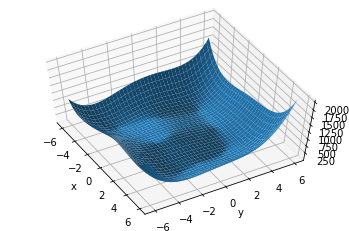

In [124]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = himmelblau([X,Y])

fig = plt.figure("himmelblau")
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



In [127]:
x = torch.tensor([0.,0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)

for step in range(20*1000):
    pred = himmelblau(x)
    
    optimizer.zero_grad()  # 这一步不是很懂
    pred.backward()
    optimizer.step()
    
    if step % 3*1000 == 0:
        print("step{}: x={}, f(x) = {}".format(step, x.tolist(), pred.item()))

step0: x=[0.0009999999310821295, 0.0009999999310821295], f(x) = 170.0
step3: x=[0.004000664222985506, 0.004000264219939709], f(x) = 169.89169311523438
step6: x=[0.00700337253510952, 0.007001344580203295], f(x) = 169.78273010253906
step9: x=[0.010009420104324818, 0.010003762319684029], f(x) = 169.673095703125
step12: x=[0.013020023703575134, 0.013008011505007744], f(x) = 169.562744140625
step15: x=[0.016036298125982285, 0.016014546155929565], f(x) = 169.45166015625
step18: x=[0.019059253856539726, 0.019023781642317772], f(x) = 169.33981323242188
step21: x=[0.02208978310227394, 0.02203608863055706], f(x) = 169.22715759277344
step24: x=[0.02512866072356701, 0.025051791220903397], f(x) = 169.11370849609375
step27: x=[0.028176546096801758, 0.028071166947484016], f(x) = 168.99942016601562
step30: x=[0.03123399242758751, 0.031094450503587723], f(x) = 168.88427734375
step33: x=[0.034301452338695526, 0.034121837466955185], f(x) = 168.76828002929688
step36: x=[0.03737929090857506, 0.037153489887

step387: x=[0.4580211341381073, 0.41885077953338623], f(x) = 148.1755828857422
step390: x=[0.46195805072784424, 0.4222801625728607], f(x) = 147.94284057617188
step393: x=[0.4658980667591095, 0.4257112443447113], f(x) = 147.709228515625
step396: x=[0.4698411524295807, 0.4291439950466156], f(x) = 147.47470092773438
step399: x=[0.47378721833229065, 0.4325783848762512], f(x) = 147.2392578125
step402: x=[0.477736234664917, 0.4360143840312958], f(x) = 147.00296020507812
step405: x=[0.48168817162513733, 0.43945199251174927], f(x) = 146.76576232910156
step408: x=[0.4856429696083069, 0.44289112091064453], f(x) = 146.52767944335938
step411: x=[0.4896005392074585, 0.44633179903030396], f(x) = 146.2886962890625
step414: x=[0.4935608208179474, 0.44977399706840515], f(x) = 146.04884338378906
step417: x=[0.49752378463745117, 0.45321765542030334], f(x) = 145.80813598632812
step420: x=[0.5014894008636475, 0.45666274428367615], f(x) = 145.56651306152344
step423: x=[0.5054576396942139, 0.4601092636585235

step780: x=[0.9839650988578796, 0.8729357719421387], f(x) = 111.59365844726562
step783: x=[0.9879574775695801, 0.8763691782951355], f(x) = 111.28179931640625
step786: x=[0.9919484257698059, 0.8798010945320129], f(x) = 110.96969604492188
step789: x=[0.9959377646446228, 0.8832314610481262], f(x) = 110.65733337402344
step792: x=[0.9999254941940308, 0.8866602778434753], f(x) = 110.34475708007812
step795: x=[1.0039114952087402, 0.8900876045227051], f(x) = 110.03194427490234
step798: x=[1.0078959465026855, 0.8935133218765259], f(x) = 109.71890258789062
step801: x=[1.0118787288665771, 0.8969374299049377], f(x) = 109.40564727783203
step804: x=[1.015859842300415, 0.9003599286079407], f(x) = 109.09217834472656
step807: x=[1.0198392868041992, 0.9037808179855347], f(x) = 108.77850341796875
step810: x=[1.0238169431686401, 0.9071999192237854], f(x) = 108.46461486816406
step813: x=[1.0277928113937378, 0.9106174111366272], f(x) = 108.15054321289062
step816: x=[1.0317670106887817, 0.9140331745147705], 

step1146: x=[1.454329013824463, 1.275023102760315], f(x) = 73.37742614746094
step1149: x=[1.458008050918579, 1.2781332731246948], f(x) = 73.07610321044922
step1152: x=[1.461683750152588, 1.2812398672103882], f(x) = 72.77517700195312
step1155: x=[1.4653561115264893, 1.2843427658081055], f(x) = 72.47465515136719
step1158: x=[1.4690250158309937, 1.2874418497085571], f(x) = 72.1745376586914
step1161: x=[1.472690463066101, 1.2905371189117432], f(x) = 71.87481689453125
step1164: x=[1.476352572441101, 1.2936285734176636], f(x) = 71.57553100585938
step1167: x=[1.4800111055374146, 1.2967162132263184], f(x) = 71.27665710449219
step1170: x=[1.4836663007736206, 1.2998000383377075], f(x) = 70.97821044921875
step1173: x=[1.4873180389404297, 1.302880048751831], f(x) = 70.68019104003906
step1176: x=[1.4909662008285522, 1.3059561252593994], f(x) = 70.38259887695312
step1179: x=[1.4946110248565674, 1.3090283870697021], f(x) = 70.08543395996094
step1182: x=[1.4982523918151855, 1.3120967149734497], f(x) =

step1683: x=[2.0504379272460938, 1.7578647136688232], f(x) = 28.898645401000977
step1686: x=[2.053373336791992, 1.7600675821304321], f(x) = 28.715391159057617
step1689: x=[2.0563039779663086, 1.7622641324996948], f(x) = 28.532917022705078
step1692: x=[2.059230089187622, 1.7644543647766113], f(x) = 28.351240158081055
step1695: x=[2.0621511936187744, 1.7666383981704712], f(x) = 28.170333862304688
step1698: x=[2.0650675296783447, 1.7688159942626953], f(x) = 27.990215301513672
step1701: x=[2.067979097366333, 1.7709872722625732], f(x) = 27.81087875366211
step1704: x=[2.0708858966827393, 1.7731523513793945], f(x) = 27.63233184814453
step1707: x=[2.0737876892089844, 1.77531099319458], f(x) = 27.454572677612305
step1710: x=[2.0766847133636475, 1.7774631977081299], f(x) = 27.277587890625
step1713: x=[2.0795769691467285, 1.779608964920044], f(x) = 27.101388931274414
step1716: x=[2.0824644565582275, 1.781748652458191], f(x) = 26.925979614257812
step1719: x=[2.0853469371795654, 1.7838819026947021]

step2049: x=[2.3717751502990723, 1.9775242805480957], f(x) = 12.0874662399292
step2052: x=[2.3740923404693604, 1.9788991212844849], f(x) = 11.992279052734375
step2055: x=[2.3764045238494873, 1.980266809463501], f(x) = 11.897703170776367
step2058: x=[2.378711462020874, 1.9816274642944336], f(x) = 11.803736686706543
step2061: x=[2.3810129165649414, 1.9829809665679932], f(x) = 11.710379600524902
step2064: x=[2.3833091259002686, 1.9843274354934692], f(x) = 11.617635726928711
step2067: x=[2.3856000900268555, 1.9856668710708618], f(x) = 11.525492668151855
step2070: x=[2.387885808944702, 1.986999273300171], f(x) = 11.433939933776855
step2073: x=[2.3901662826538086, 1.988324522972107], f(x) = 11.342997550964355
step2076: x=[2.3924412727355957, 1.9896427392959595], f(x) = 11.25264835357666
step2079: x=[2.3947112560272217, 1.9909539222717285], f(x) = 11.162890434265137
step2082: x=[2.3969759941101074, 1.992258071899414], f(x) = 11.073724746704102
step2085: x=[2.399235248565674, 1.993555068969726

step2448: x=[2.6335978507995605, 2.1000914573669434], f(x) = 3.871239185333252
step2451: x=[2.635215997695923, 2.1005806922912598], f(x) = 3.8361451625823975
step2454: x=[2.636829137802124, 2.1010642051696777], f(x) = 3.8013455867767334
step2457: x=[2.638437271118164, 2.1015419960021973], f(x) = 3.766839027404785
step2460: x=[2.640040159225464, 2.1020138263702393], f(x) = 3.732619047164917
step2463: x=[2.6416380405426025, 2.102479934692383], f(x) = 3.6986916065216064
step2466: x=[2.643230676651001, 2.102940320968628], f(x) = 3.6650471687316895
step2469: x=[2.6448183059692383, 2.1033949851989746], f(x) = 3.6316869258880615
step2472: x=[2.6464009284973145, 2.103843927383423], f(x) = 3.598609209060669
step2475: x=[2.6479785442352295, 2.1042871475219727], f(x) = 3.5658116340637207
step2478: x=[2.6495509147644043, 2.104724645614624], f(x) = 3.533292531967163
step2481: x=[2.651118278503418, 2.105156660079956], f(x) = 3.501049518585205
step2484: x=[2.6526806354522705, 2.1055829524993896], f(x

step2778: x=[2.782292604446411, 2.1234946250915527], f(x) = 1.3784284591674805
step2781: x=[2.7833876609802246, 2.123471260070801], f(x) = 1.3652197122573853
step2784: x=[2.7844784259796143, 2.1234443187713623], f(x) = 1.352131962776184
step2787: x=[2.78556489944458, 2.1234140396118164], f(x) = 1.3391661643981934
step2790: x=[2.786647081375122, 2.123380422592163], f(x) = 1.3263169527053833
step2793: x=[2.7877249717712402, 2.1233434677124023], f(x) = 1.3135874271392822
step2796: x=[2.7887985706329346, 2.123303174972534], f(x) = 1.3009732961654663
step2799: x=[2.789867877960205, 2.1232597827911377], f(x) = 1.288476824760437
step2802: x=[2.7909328937530518, 2.123213052749634], f(x) = 1.276096224784851
step2805: x=[2.7919936180114746, 2.1231632232666016], f(x) = 1.2638295888900757
step2808: x=[2.7930500507354736, 2.123110055923462], f(x) = 1.251676082611084
step2811: x=[2.794102191925049, 2.123053789138794], f(x) = 1.239637017250061
step2814: x=[2.7951500415802, 2.1229941844940186], f(x) =

step3414: x=[2.9335501194000244, 2.075453996658325], f(x) = 0.16034390032291412
step3417: x=[2.933957099914551, 2.0751516819000244], f(x) = 0.1586042195558548
step3420: x=[2.9343619346618652, 2.074849843978882], f(x) = 0.1568826138973236
step3423: x=[2.9347646236419678, 2.0745480060577393], f(x) = 0.15517748892307281
step3426: x=[2.9351651668548584, 2.074246406555176], f(x) = 0.1534895896911621
step3429: x=[2.935563564300537, 2.0739452838897705], f(x) = 0.15181830525398254
step3432: x=[2.935959815979004, 2.0736441612243652], f(x) = 0.15016409754753113
step3435: x=[2.936353921890259, 2.073343276977539], f(x) = 0.14852647483348846
step3438: x=[2.9367458820343018, 2.073042869567871], f(x) = 0.14690560102462769
step3441: x=[2.937135696411133, 2.072742462158203], f(x) = 0.14530082046985626
step3444: x=[2.937523365020752, 2.0724425315856934], f(x) = 0.14371217787265778
step3447: x=[2.937908887863159, 2.0721428394317627], f(x) = 0.14213953912258148
step3450: x=[2.9382922649383545, 2.071843385

step3816: x=[2.9721901416778564, 2.039327621459961], f(x) = 0.0333816260099411
step3819: x=[2.972381353378296, 2.0391039848327637], f(x) = 0.032960884273052216
step3822: x=[2.97257137298584, 2.038881301879883], f(x) = 0.03254528343677521
step3825: x=[2.972759962081909, 2.0386593341827393], f(x) = 0.032134391367435455
step3828: x=[2.972947597503662, 2.038438081741333], f(x) = 0.031728293746709824
step3831: x=[2.9731340408325195, 2.038217544555664], f(x) = 0.03132683411240578
step3834: x=[2.9733195304870605, 2.0379979610443115], f(x) = 0.03093009442090988
step3837: x=[2.973503828048706, 2.0377790927886963], f(x) = 0.03053697943687439
step3840: x=[2.973687171936035, 2.0375611782073975], f(x) = 0.030148956924676895
step3843: x=[2.9738693237304688, 2.037343978881836], f(x) = 0.02976519986987114
step3846: x=[2.974050521850586, 2.0371274948120117], f(x) = 0.029385991394519806
step3849: x=[2.9742305278778076, 2.036911964416504], f(x) = 0.02901073917746544
step3852: x=[2.974409580230713, 2.0366

step4200: x=[2.989154577255249, 2.0171382427215576], f(x) = 0.005679255351424217
step4203: x=[2.9892396926879883, 2.0170135498046875], f(x) = 0.005593768320977688
step4206: x=[2.9893243312835693, 2.0168895721435547], f(x) = 0.005509709939360619
step4209: x=[2.989408493041992, 2.016766309738159], f(x) = 0.0054265959188342094
step4212: x=[2.9894919395446777, 2.016643524169922], f(x) = 0.005344719626009464
step4215: x=[2.989574909210205, 2.016521453857422], f(x) = 0.005263945087790489
step4218: x=[2.989657163619995, 2.016400098800659], f(x) = 0.005184279289096594
step4221: x=[2.989738941192627, 2.016279458999634], f(x) = 0.005105745512992144
step4224: x=[2.9898202419281006, 2.0161595344543457], f(x) = 0.005028193816542625
step4227: x=[2.989901065826416, 2.016040325164795], f(x) = 0.004951750859618187
step4230: x=[2.989981174468994, 2.0159215927124023], f(x) = 0.004876374267041683
step4233: x=[2.990060806274414, 2.015803575515747], f(x) = 0.004802013281732798
step4236: x=[2.990139961242676

step4557: x=[2.996056318283081, 2.006535530090332], f(x) = 0.0007922307122498751
step4560: x=[2.9960923194885254, 2.0064773559570312], f(x) = 0.0007780317100696266
step4563: x=[2.9961280822753906, 2.0064194202423096], f(x) = 0.0007640671683475375
step4566: x=[2.996163845062256, 2.006362199783325], f(x) = 0.0007502801599912345
step4569: x=[2.996198892593384, 2.00630521774292], f(x) = 0.0007367859361693263
step4572: x=[2.9962339401245117, 2.006248712539673], f(x) = 0.0007235159282572567
step4575: x=[2.9962687492370605, 2.006192684173584], f(x) = 0.0007103759562596679
step4578: x=[2.996303081512451, 2.006136894226074], f(x) = 0.0006975496653467417
step4581: x=[2.996337413787842, 2.0060818195343018], f(x) = 0.0006849089404568076
step4584: x=[2.996371030807495, 2.0060267448425293], f(x) = 0.0006724938284605742
step4587: x=[2.9964046478271484, 2.005972385406494], f(x) = 0.0006603101501241326
step4590: x=[2.9964382648468018, 2.005918264389038], f(x) = 0.000648246961645782
step4593: x=[2.99647

step4956: x=[2.9989731311798096, 2.001735210418701], f(x) = 5.499093822436407e-05
step4959: x=[2.9989845752716064, 2.001715898513794], f(x) = 5.377568231779151e-05
step4962: x=[2.9989960193634033, 2.001697063446045], f(x) = 5.25850809935946e-05
step4965: x=[2.9990074634552, 2.001678466796875], f(x) = 5.142153531778604e-05
step4968: x=[2.999018430709839, 2.001659870147705], f(x) = 5.02952971146442e-05
step4971: x=[2.9990291595458984, 2.001641273498535], f(x) = 4.918682316201739e-05
step4974: x=[2.999039888381958, 2.0016231536865234], f(x) = 4.8106601752806455e-05
step4977: x=[2.9990506172180176, 2.001605272293091], f(x) = 4.704884850070812e-05
step4980: x=[2.999061346054077, 2.001587390899658], f(x) = 4.5997730921953917e-05
step4983: x=[2.9990720748901367, 2.0015695095062256], f(x) = 4.497380359680392e-05
step4986: x=[2.9990828037261963, 2.001551866531372], f(x) = 4.394876668811776e-05
step4989: x=[2.9990928173065186, 2.0015347003936768], f(x) = 4.2988038330804557e-05
step4992: x=[2.999

step5421: x=[2.9998528957366943, 2.000248670578003], f(x) = 1.131114004238043e-06
step5424: x=[2.9998550415039062, 2.0002450942993164], f(x) = 1.0980911611113697e-06
step5427: x=[2.999857187271118, 2.00024151802063], f(x) = 1.0663463854143629e-06
step5430: x=[2.99985933303833, 2.0002379417419434], f(x) = 1.0350677257520147e-06
step5433: x=[2.999861478805542, 2.000234365463257], f(x) = 1.0046323950518854e-06
step5436: x=[2.999863624572754, 2.0002307891845703], f(x) = 9.73524947767146e-07
step5439: x=[2.999865770339966, 2.000227212905884], f(x) = 9.447578577237437e-07
step5442: x=[2.9998679161071777, 2.0002238750457764], f(x) = 9.142395356320776e-07
step5445: x=[2.9998700618743896, 2.000221014022827], f(x) = 8.889010132406838e-07
step5448: x=[2.9998722076416016, 2.000218152999878], f(x) = 8.628740033600479e-07
step5451: x=[2.9998743534088135, 2.0002152919769287], f(x) = 8.389854428969556e-07
step5454: x=[2.9998764991760254, 2.0002124309539795], f(x) = 8.144288585754111e-07
step5457: x=[2

step5886: x=[2.9999828338623047, 2.0000221729278564], f(x) = 1.1687006917782128e-08
step5889: x=[2.9999828338623047, 2.0000221729278564], f(x) = 1.1687006917782128e-08
step5892: x=[2.9999828338623047, 2.0000221729278564], f(x) = 1.1687006917782128e-08
step5895: x=[2.9999828338623047, 2.0000221729278564], f(x) = 1.1687006917782128e-08
step5898: x=[2.9999828338623047, 2.0000221729278564], f(x) = 1.1687006917782128e-08
step5901: x=[2.9999828338623047, 2.0000221729278564], f(x) = 1.1687006917782128e-08
step5904: x=[2.999983072280884, 2.0000221729278564], f(x) = 1.1381416697986424e-08
step5907: x=[2.999983072280884, 2.0000221729278564], f(x) = 1.1381416697986424e-08
step5910: x=[2.999983072280884, 2.0000221729278564], f(x) = 1.1381416697986424e-08
step5913: x=[2.999983072280884, 2.0000221729278564], f(x) = 1.1381416697986424e-08
step5916: x=[2.999983072280884, 2.0000221729278564], f(x) = 1.1381416697986424e-08
step5919: x=[2.999983072280884, 2.0000221729278564], f(x) = 1.1381416697986424e-0

step6294: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6297: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6300: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6303: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6306: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6309: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6312: x=[2.999985694885254, 2.0000193119049072], f(x) = 8.418282959610224e-09
step6315: x=[2.999985933303833, 2.0000193119049072], f(x) = 8.167262421920896e-09
step6318: x=[2.999985933303833, 2.0000193119049072], f(x) = 8.167262421920896e-09
step6321: x=[2.999985933303833, 2.0000193119049072], f(x) = 8.167262421920896e-09
step6324: x=[2.999985933303833, 2.0000193119049072], f(x) = 8.167262421920896e-09
step6327: x=[2.999985933303833, 2.0000193119049072], f(x) = 8.167262421920896e-09
step6330: x=[2.9

step6741: x=[2.9999887943267822, 2.0000154972076416], f(x) = 5.206857167650014e-09
step6744: x=[2.9999887943267822, 2.0000154972076416], f(x) = 5.206857167650014e-09
step6747: x=[2.9999887943267822, 2.0000154972076416], f(x) = 5.206857167650014e-09
step6750: x=[2.9999887943267822, 2.0000154972076416], f(x) = 5.206857167650014e-09
step6753: x=[2.9999887943267822, 2.0000154972076416], f(x) = 5.206857167650014e-09
step6756: x=[2.9999887943267822, 2.0000154972076416], f(x) = 5.206857167650014e-09
step6759: x=[2.9999887943267822, 2.0000152587890625], f(x) = 5.111360223963857e-09
step6762: x=[2.9999887943267822, 2.0000152587890625], f(x) = 5.111360223963857e-09
step6765: x=[2.9999887943267822, 2.0000152587890625], f(x) = 5.111360223963857e-09
step6768: x=[2.9999887943267822, 2.0000152587890625], f(x) = 5.111360223963857e-09
step6771: x=[2.9999887943267822, 2.0000152587890625], f(x) = 5.111360223963857e-09
step6774: x=[2.9999887943267822, 2.0000152587890625], f(x) = 5.111360223963857e-09
step

step7065: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7068: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7071: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7074: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7077: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7080: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7083: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7086: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7089: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7092: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7095: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7098: x=[2.999990224838257, 2.0000131130218506], f(x) = 3.850800567306578e-09
step7101: x=[2.9

step7410: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7413: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7416: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7419: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7422: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7425: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7428: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7431: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7434: x=[2.9999916553497314, 2.0000112056732178], f(x) = 2.7685018721967936e-09
step7437: x=[2.9999918937683105, 2.0000109672546387], f(x) = 2.7314399630995467e-09
step7440: x=[2.9999921321868896, 2.0000109672546387], f(x) = 2.7341684472048655e-09
step7443: x=[2.9999921321868896, 2.0000107288360596], f(x) = 2.5584085960872

step7758: x=[2.999993085861206, 2.000009298324585], f(x) = 1.9217623048461974e-09
step7761: x=[2.999993085861206, 2.000009298324585], f(x) = 1.9217623048461974e-09
step7764: x=[2.999993085861206, 2.000009298324585], f(x) = 1.9217623048461974e-09
step7767: x=[2.999993085861206, 2.000009298324585], f(x) = 1.9217623048461974e-09
step7770: x=[2.999993085861206, 2.000009298324585], f(x) = 1.9217623048461974e-09
step7773: x=[2.999993085861206, 2.000009059906006], f(x) = 1.925400283653289e-09
step7776: x=[2.999993085861206, 2.000009059906006], f(x) = 1.925400283653289e-09
step7779: x=[2.999993085861206, 2.000009059906006], f(x) = 1.925400283653289e-09
step7782: x=[2.999993324279785, 2.000009059906006], f(x) = 1.8053469830192626e-09
step7785: x=[2.999993324279785, 2.000009059906006], f(x) = 1.8053469830192626e-09
step7788: x=[2.999993324279785, 2.000009059906006], f(x) = 1.8053469830192626e-09
step7791: x=[2.999993324279785, 2.000009059906006], f(x) = 1.8053469830192626e-09
step7794: x=[2.9999

step8103: x=[2.9999942779541016, 2.0000078678131104], f(x) = 1.3760654837824404e-09
step8106: x=[2.9999942779541016, 2.0000078678131104], f(x) = 1.3760654837824404e-09
step8109: x=[2.9999942779541016, 2.0000078678131104], f(x) = 1.3760654837824404e-09
step8112: x=[2.9999942779541016, 2.0000078678131104], f(x) = 1.3760654837824404e-09
step8115: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3760654837824404e-09
step8118: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884752e-09
step8121: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884752e-09
step8124: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884752e-09
step8127: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884752e-09
step8130: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884752e-09
step8133: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884752e-09
step8136: x=[2.9999942779541016, 2.0000076293945312], f(x) = 1.3278622645884

step8508: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8511: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8514: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8517: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8520: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8523: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8526: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8529: x=[2.999995231628418, 2.0000064373016357], f(x) = 9.213181328959763e-10
step8532: x=[2.999995470046997, 2.0000061988830566], f(x) = 9.24956111703068e-10
step8535: x=[2.999995708465576, 2.0000061988830566], f(x) = 7.842118066037074e-10
step8538: x=[2.999995708465576, 2.0000059604644775], f(x) = 7.842118066037074e-10
step8541: x=[2.999995708465576, 2.0000059604644775], f(x) = 7.833023119019344e-10
step8544: x=[2.99

step8892: x=[2.9999961853027344, 2.0000052452087402], f(x) = 5.893525667488575e-10
step8895: x=[2.9999961853027344, 2.0000052452087402], f(x) = 5.893525667488575e-10
step8898: x=[2.9999961853027344, 2.0000052452087402], f(x) = 5.893525667488575e-10
step8901: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.893525667488575e-10
step8904: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.911715561524034e-10
step8907: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.911715561524034e-10
step8910: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.911715561524034e-10
step8913: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.911715561524034e-10
step8916: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.911715561524034e-10
step8919: x=[2.9999961853027344, 2.000005006790161], f(x) = 5.911715561524034e-10
step8922: x=[2.9999964237213135, 2.000005006790161], f(x) = 5.256879376247525e-10
step8925: x=[2.9999964237213135, 2.000005006790161], f(x) = 5.256879376247525e-10
step8928: x=[

step9252: x=[2.9999969005584717, 2.000004291534424], f(x) = 3.828972694464028e-10
step9255: x=[2.9999969005584717, 2.000004291534424], f(x) = 3.828972694464028e-10
step9258: x=[2.9999969005584717, 2.000004291534424], f(x) = 3.828972694464028e-10
step9261: x=[2.9999969005584717, 2.000004291534424], f(x) = 3.828972694464028e-10
step9264: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9267: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9270: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9273: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9276: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9279: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9282: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9285: x=[2.9999969005584717, 2.0000040531158447], f(x) = 3.828972694464028e-10
step9288

step9591: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9594: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9597: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9600: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9603: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9606: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9609: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9612: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9615: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9618: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9621: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9624: x=[2.99999737739563, 2.0000035762786865], f(x) = 2.6193447411060333e-10
step9627: x=[2.9

step9894: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9897: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9900: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9903: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9906: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9909: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9912: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9915: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9918: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9921: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9924: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9927: x=[2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step9930: x=[2.9

step10227: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10230: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10233: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10236: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10239: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10242: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10245: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10248: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10251: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10254: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10257: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10260: x=[2.999998092651367, 2.00000262260437], f(x) = 1.4733814168721437e-10
step10263: x=[2.

step10575: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10578: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10581: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10584: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10587: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10590: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10593: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10596: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10599: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10602: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10605: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step10608: x=[2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034

step10998: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11001: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11004: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11007: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11010: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11013: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11016: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11019: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11022: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11025: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11028: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step11031: x=[2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814

step11304: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11307: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11310: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11313: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11316: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11319: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11322: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11325: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11328: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11331: x=[2.9999990463256836, 2.0000014305114746], f(x) = 3.728928277269006e-11
step11334: x=[2.9999990463256836, 2.0000011920928955], f(x) = 3.728928277269006e-11
step11337: x=[2.9999990463256836, 2.0000011920928955], f(x) = 3.728928277269

step11610: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11613: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11616: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11619: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11622: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11625: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11628: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11631: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11634: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11637: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11640: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2737367544323206e-11
step11643: x=[2.9999992847442627, 2.0000011920928955], f(x) = 2.2

step12165: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12168: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12171: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12174: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12177: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12180: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12183: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12186: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12189: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12192: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12195: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12198: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6

step12471: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12474: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12477: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12480: x=[2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step12483: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12486: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12489: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12492: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12495: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12498: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12501: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step12504: x=[2.9999992847442627, 2.0000007152557373], f(x) = 1.1

step12774: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12777: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12780: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12783: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12786: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12789: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12792: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12795: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12798: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12801: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12804: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step12807: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step

step13077: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13080: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13083: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13086: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13089: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13092: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13095: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13098: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13101: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13104: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13107: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step13110: x=[2.999999523162842, 2.000000476837158], f(x) = 5.6843418860808015e-12
step

step13398: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13401: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13404: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13407: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13410: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13413: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13416: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13419: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13422: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13425: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13428: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13431: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step

step13716: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13719: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13722: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13725: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13728: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13731: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13734: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13737: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13740: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13743: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13746: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step13749: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step

step14019: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14022: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14025: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14028: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14031: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14034: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14037: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14040: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14043: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14046: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14049: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14052: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step

step14394: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14397: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14400: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14403: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14406: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14409: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14412: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14415: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14418: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14421: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14424: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step14427: x=[2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step

step14760: x=[3.0, 2.0], f(x) = 0.0
step14763: x=[3.0, 2.0], f(x) = 0.0
step14766: x=[3.0, 2.0], f(x) = 0.0
step14769: x=[3.0, 2.0], f(x) = 0.0
step14772: x=[3.0, 2.0], f(x) = 0.0
step14775: x=[3.0, 2.0], f(x) = 0.0
step14778: x=[3.0, 2.0], f(x) = 0.0
step14781: x=[3.0, 2.0], f(x) = 0.0
step14784: x=[3.0, 2.0], f(x) = 0.0
step14787: x=[3.0, 2.0], f(x) = 0.0
step14790: x=[3.0, 2.0], f(x) = 0.0
step14793: x=[3.0, 2.0], f(x) = 0.0
step14796: x=[3.0, 2.0], f(x) = 0.0
step14799: x=[3.0, 2.0], f(x) = 0.0
step14802: x=[3.0, 2.0], f(x) = 0.0
step14805: x=[3.0, 2.0], f(x) = 0.0
step14808: x=[3.0, 2.0], f(x) = 0.0
step14811: x=[3.0, 2.0], f(x) = 0.0
step14814: x=[3.0, 2.0], f(x) = 0.0
step14817: x=[3.0, 2.0], f(x) = 0.0
step14820: x=[3.0, 2.0], f(x) = 0.0
step14823: x=[3.0, 2.0], f(x) = 0.0
step14826: x=[3.0, 2.0], f(x) = 0.0
step14829: x=[3.0, 2.0], f(x) = 0.0
step14832: x=[3.0, 2.0], f(x) = 0.0
step14835: x=[3.0, 2.0], f(x) = 0.0
step14838: x=[3.0, 2.0], f(x) = 0.0
step14841: x=[3.0, 2.0], f(x

step15588: x=[3.0, 2.0], f(x) = 0.0
step15591: x=[3.0, 2.0], f(x) = 0.0
step15594: x=[3.0, 2.0], f(x) = 0.0
step15597: x=[3.0, 2.0], f(x) = 0.0
step15600: x=[3.0, 2.0], f(x) = 0.0
step15603: x=[3.0, 2.0], f(x) = 0.0
step15606: x=[3.0, 2.0], f(x) = 0.0
step15609: x=[3.0, 2.0], f(x) = 0.0
step15612: x=[3.0, 2.0], f(x) = 0.0
step15615: x=[3.0, 2.0], f(x) = 0.0
step15618: x=[3.0, 2.0], f(x) = 0.0
step15621: x=[3.0, 2.0], f(x) = 0.0
step15624: x=[3.0, 2.0], f(x) = 0.0
step15627: x=[3.0, 2.0], f(x) = 0.0
step15630: x=[3.0, 2.0], f(x) = 0.0
step15633: x=[3.0, 2.0], f(x) = 0.0
step15636: x=[3.0, 2.0], f(x) = 0.0
step15639: x=[3.0, 2.0], f(x) = 0.0
step15642: x=[3.0, 2.0], f(x) = 0.0
step15645: x=[3.0, 2.0], f(x) = 0.0
step15648: x=[3.0, 2.0], f(x) = 0.0
step15651: x=[3.0, 2.0], f(x) = 0.0
step15654: x=[3.0, 2.0], f(x) = 0.0
step15657: x=[3.0, 2.0], f(x) = 0.0
step15660: x=[3.0, 2.0], f(x) = 0.0
step15663: x=[3.0, 2.0], f(x) = 0.0
step15666: x=[3.0, 2.0], f(x) = 0.0
step15669: x=[3.0, 2.0], f(x

step16401: x=[3.0, 2.0], f(x) = 0.0
step16404: x=[3.0, 2.0], f(x) = 0.0
step16407: x=[3.0, 2.0], f(x) = 0.0
step16410: x=[3.0, 2.0], f(x) = 0.0
step16413: x=[3.0, 2.0], f(x) = 0.0
step16416: x=[3.0, 2.0], f(x) = 0.0
step16419: x=[3.0, 2.0], f(x) = 0.0
step16422: x=[3.0, 2.0], f(x) = 0.0
step16425: x=[3.0, 2.0], f(x) = 0.0
step16428: x=[3.0, 2.0], f(x) = 0.0
step16431: x=[3.0, 2.0], f(x) = 0.0
step16434: x=[3.0, 2.0], f(x) = 0.0
step16437: x=[3.0, 2.0], f(x) = 0.0
step16440: x=[3.0, 2.0], f(x) = 0.0
step16443: x=[3.0, 2.0], f(x) = 0.0
step16446: x=[3.0, 2.0], f(x) = 0.0
step16449: x=[3.0, 2.0], f(x) = 0.0
step16452: x=[3.0, 2.0], f(x) = 0.0
step16455: x=[3.0, 2.0], f(x) = 0.0
step16458: x=[3.0, 2.0], f(x) = 0.0
step16461: x=[3.0, 2.0], f(x) = 0.0
step16464: x=[3.0, 2.0], f(x) = 0.0
step16467: x=[3.0, 2.0], f(x) = 0.0
step16470: x=[3.0, 2.0], f(x) = 0.0
step16473: x=[3.0, 2.0], f(x) = 0.0
step16476: x=[3.0, 2.0], f(x) = 0.0
step16479: x=[3.0, 2.0], f(x) = 0.0
step16482: x=[3.0, 2.0], f(x

step17157: x=[3.0, 2.0], f(x) = 0.0
step17160: x=[3.0, 2.0], f(x) = 0.0
step17163: x=[3.0, 2.0], f(x) = 0.0
step17166: x=[3.0, 2.0], f(x) = 0.0
step17169: x=[3.0, 2.0], f(x) = 0.0
step17172: x=[3.0, 2.0], f(x) = 0.0
step17175: x=[3.0, 2.0], f(x) = 0.0
step17178: x=[3.0, 2.0], f(x) = 0.0
step17181: x=[3.0, 2.0], f(x) = 0.0
step17184: x=[3.0, 2.0], f(x) = 0.0
step17187: x=[3.0, 2.0], f(x) = 0.0
step17190: x=[3.0, 2.0], f(x) = 0.0
step17193: x=[3.0, 2.0], f(x) = 0.0
step17196: x=[3.0, 2.0], f(x) = 0.0
step17199: x=[3.0, 2.0], f(x) = 0.0
step17202: x=[3.0, 2.0], f(x) = 0.0
step17205: x=[3.0, 2.0], f(x) = 0.0
step17208: x=[3.0, 2.0], f(x) = 0.0
step17211: x=[3.0, 2.0], f(x) = 0.0
step17214: x=[3.0, 2.0], f(x) = 0.0
step17217: x=[3.0, 2.0], f(x) = 0.0
step17220: x=[3.0, 2.0], f(x) = 0.0
step17223: x=[3.0, 2.0], f(x) = 0.0
step17226: x=[3.0, 2.0], f(x) = 0.0
step17229: x=[3.0, 2.0], f(x) = 0.0
step17232: x=[3.0, 2.0], f(x) = 0.0
step17235: x=[3.0, 2.0], f(x) = 0.0
step17238: x=[3.0, 2.0], f(x

step17958: x=[3.0, 2.0], f(x) = 0.0
step17961: x=[3.0, 2.0], f(x) = 0.0
step17964: x=[3.0, 2.0], f(x) = 0.0
step17967: x=[3.0, 2.0], f(x) = 0.0
step17970: x=[3.0, 2.0], f(x) = 0.0
step17973: x=[3.0, 2.0], f(x) = 0.0
step17976: x=[3.0, 2.0], f(x) = 0.0
step17979: x=[3.0, 2.0], f(x) = 0.0
step17982: x=[3.0, 2.0], f(x) = 0.0
step17985: x=[3.0, 2.0], f(x) = 0.0
step17988: x=[3.0, 2.0], f(x) = 0.0
step17991: x=[3.0, 2.0], f(x) = 0.0
step17994: x=[3.0, 2.0], f(x) = 0.0
step17997: x=[3.0, 2.0], f(x) = 0.0
step18000: x=[3.0, 2.0], f(x) = 0.0
step18003: x=[3.0, 2.0], f(x) = 0.0
step18006: x=[3.0, 2.0], f(x) = 0.0
step18009: x=[3.0, 2.0], f(x) = 0.0
step18012: x=[3.0, 2.0], f(x) = 0.0
step18015: x=[3.0, 2.0], f(x) = 0.0
step18018: x=[3.0, 2.0], f(x) = 0.0
step18021: x=[3.0, 2.0], f(x) = 0.0
step18024: x=[3.0, 2.0], f(x) = 0.0
step18027: x=[3.0, 2.0], f(x) = 0.0
step18030: x=[3.0, 2.0], f(x) = 0.0
step18033: x=[3.0, 2.0], f(x) = 0.0
step18036: x=[3.0, 2.0], f(x) = 0.0
step18039: x=[3.0, 2.0], f(x

step18768: x=[3.0, 2.0], f(x) = 0.0
step18771: x=[3.0, 2.0], f(x) = 0.0
step18774: x=[3.0, 2.0], f(x) = 0.0
step18777: x=[3.0, 2.0], f(x) = 0.0
step18780: x=[3.0, 2.0], f(x) = 0.0
step18783: x=[3.0, 2.0], f(x) = 0.0
step18786: x=[3.0, 2.0], f(x) = 0.0
step18789: x=[3.0, 2.0], f(x) = 0.0
step18792: x=[3.0, 2.0], f(x) = 0.0
step18795: x=[3.0, 2.0], f(x) = 0.0
step18798: x=[3.0, 2.0], f(x) = 0.0
step18801: x=[3.0, 2.0], f(x) = 0.0
step18804: x=[3.0, 2.0], f(x) = 0.0
step18807: x=[3.0, 2.0], f(x) = 0.0
step18810: x=[3.0, 2.0], f(x) = 0.0
step18813: x=[3.0, 2.0], f(x) = 0.0
step18816: x=[3.0, 2.0], f(x) = 0.0
step18819: x=[3.0, 2.0], f(x) = 0.0
step18822: x=[3.0, 2.0], f(x) = 0.0
step18825: x=[3.0, 2.0], f(x) = 0.0
step18828: x=[3.0, 2.0], f(x) = 0.0
step18831: x=[3.0, 2.0], f(x) = 0.0
step18834: x=[3.0, 2.0], f(x) = 0.0
step18837: x=[3.0, 2.0], f(x) = 0.0
step18840: x=[3.0, 2.0], f(x) = 0.0
step18843: x=[3.0, 2.0], f(x) = 0.0
step18846: x=[3.0, 2.0], f(x) = 0.0
step18849: x=[3.0, 2.0], f(x

step19581: x=[3.0, 2.0], f(x) = 0.0
step19584: x=[3.0, 2.0], f(x) = 0.0
step19587: x=[3.0, 2.0], f(x) = 0.0
step19590: x=[3.0, 2.0], f(x) = 0.0
step19593: x=[3.0, 2.0], f(x) = 0.0
step19596: x=[3.0, 2.0], f(x) = 0.0
step19599: x=[3.0, 2.0], f(x) = 0.0
step19602: x=[3.0, 2.0], f(x) = 0.0
step19605: x=[3.0, 2.0], f(x) = 0.0
step19608: x=[3.0, 2.0], f(x) = 0.0
step19611: x=[3.0, 2.0], f(x) = 0.0
step19614: x=[3.0, 2.0], f(x) = 0.0
step19617: x=[3.0, 2.0], f(x) = 0.0
step19620: x=[3.0, 2.0], f(x) = 0.0
step19623: x=[3.0, 2.0], f(x) = 0.0
step19626: x=[3.0, 2.0], f(x) = 0.0
step19629: x=[3.0, 2.0], f(x) = 0.0
step19632: x=[3.0, 2.0], f(x) = 0.0
step19635: x=[3.0, 2.0], f(x) = 0.0
step19638: x=[3.0, 2.0], f(x) = 0.0
step19641: x=[3.0, 2.0], f(x) = 0.0
step19644: x=[3.0, 2.0], f(x) = 0.0
step19647: x=[3.0, 2.0], f(x) = 0.0
step19650: x=[3.0, 2.0], f(x) = 0.0
step19653: x=[3.0, 2.0], f(x) = 0.0
step19656: x=[3.0, 2.0], f(x) = 0.0
step19659: x=[3.0, 2.0], f(x) = 0.0
step19662: x=[3.0, 2.0], f(x